<a href="https://colab.research.google.com/github/Krupa049/Gradient-Descent/blob/main/GD_2D%2C_Fixed%2C_Grad%2C_Time.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from IPython import display
display.set_matplotlib_formats('svg')

<ipython-input-1-6100ab58204d>:5: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')


In [2]:
x = np.linspace(-2,2,2001)

def fx(x):
  return 3*x**2 - 3*x + 4

def deriv(x):
  return 6*x - 3

In [3]:
localmin = np.random.choice(x,1)[0]
initval = localmin

learning_rate = .01
training_epochs = 50

modelparamsFixed = np.zeros((training_epochs,3))
for i in range(training_epochs):
  grad = deriv(localmin)
  lr = learning_rate
  localmin = localmin - lr*grad
  modelparamsFixed[i,:] = localmin,grad,lr

In [4]:
localmin = np.random.choice(x,1)[0]
initval = localmin

learning_rate = .01
training_epochs = 50

modelparamsGrad = np.zeros((training_epochs,3))
for i in range(training_epochs):
  grad = deriv(localmin)
  lr = learning_rate*np.abs(grad)
  localmin = localmin - lr*grad
  modelparamsGrad[i,:] = localmin,grad,lr

In [5]:
learning_rate = .1
localmin = initval

modelparamsTime = np.zeros((training_epochs,3))
for i in range(training_epochs):
  grad = deriv(localmin)
  lr = learning_rate*(1-(i+1)/training_epochs)
  localmin = localmin - lr*grad
  modelparamsTime[i,:] = localmin,grad,lr

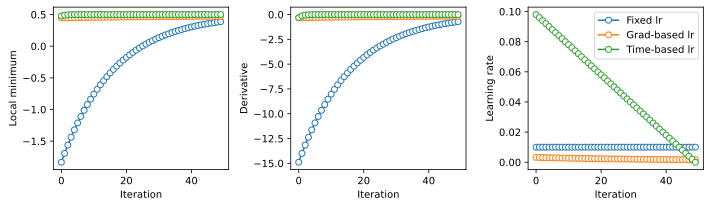

In [6]:
fig,ax = plt.subplots(1,3,figsize=(10,3))

for i in range(3):
  ax[i].plot(modelparamsFixed[:,i],'o-',markerfacecolor='w')
  ax[i].plot(modelparamsGrad[:,i],'o-',markerfacecolor='w')
  ax[i].plot(modelparamsTime[:,i],'o-',markerfacecolor='w')
  ax[i].set_xlabel('Iteration')

ax[0].set_ylabel('Local minimum')
ax[1].set_ylabel('Derivative')
ax[2].set_ylabel('Learning rate')
ax[2].legend(['Fixed lr','Grad-based lr','Time-based lr'])

plt.tight_layout()
plt.show()